# Chapter 8, Example 3

## Import packages

In [1]:
# Import TensorFlow and Keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Set random seed and initialize hyper-parameters

In [2]:
# Set random seed for reproducibility
seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

# Initialize hyper-parameters
n_in = 8
n_hidden = 5
n_out = 3
n_steps = 64
n_seqs = 16
n_iters = 25000
lr = 0.0001

## Generate training data

In [3]:
# Inputs
x_train = tf.constant(np.random.rand(n_seqs, n_steps, n_in), dtype=tf.float32)
x_train = tf.split(x_train, n_steps, axis=1)  # separate into a list

# Groundtruths
y_train = np.random.randint(size=(n_seqs, n_steps), low=0, high=n_out)
y_train = tf.reshape(tf.constant(y_train, dtype=tf.float32), [n_seqs, n_steps, 1])

## Define the RNN

In [4]:
class RNN(Model):
    def __init__(self, n_in, n_hidden, n_out):

        super(RNN, self).__init__()

        self.n_hidden = n_hidden

        # Specify the weights and biases
        self.u = tf.Variable(tf.random.truncated_normal([n_in, n_hidden], stddev=1 / np.sqrt(n_in)))
        self.w = tf.Variable(tf.random.truncated_normal([n_hidden, n_hidden], stddev=1 / np.sqrt(n_hidden)))
        self.v = tf.Variable(tf.random.truncated_normal([n_hidden, n_out], stddev=1 / np.sqrt(n_hidden)))
        self.b = tf.Variable(tf.zeros([n_hidden]))
        self.c = tf.Variable(tf.zeros([n_out]))

    def call(self, x):
      
        # The initial hidden state, which is a zero vector
        h = tf.constant(np.array([0] * self.n_hidden), dtype=tf.float32)
        h = tf.tile(tf.reshape(h, [1, h.shape[0]]), [x[0].shape[0], 1])
        
        ys = []
        for i in range(0, len(x)):
            h = tf.tanh(tf.matmul(tf.squeeze(x[i]), self.u) + tf.matmul(h, self.w) + self.b)
            u = tf.matmul(h, self.v) + self.c
            ys.append(u)
        
        return tf.stack(ys, axis=1)


## Training

In [5]:
# Reset the random seed
np.random.seed(seed)
tf.random.set_seed(seed)

# Initialize the model, optimizer and loss for training
rnn = RNN(n_in, n_hidden, n_out)
optimizer = keras.optimizers.Adam(lr)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Training
print('Training starts...')
rnn.compile(optimizer=optimizer, loss=loss)
history = rnn.fit(x_train, y_train,
                  batch_size=n_seqs,
                  epochs=n_iters,
                  verbose=0)
print('Training ended...')


Training starts...
Training ended...


## Visualization

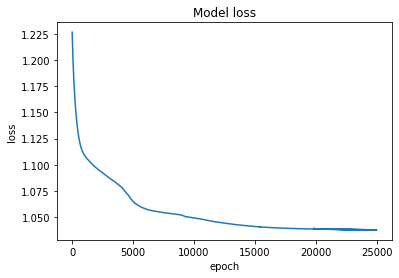

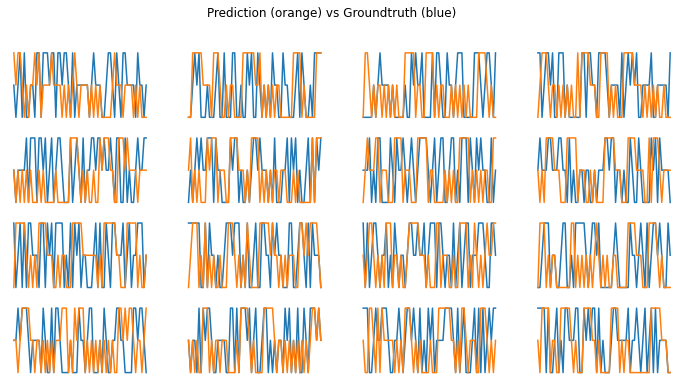

In [6]:

# Plot the loss curve
loss_values = history.history['loss']
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Pass the training data to the trained model
y_pred = rnn(x_train)
y_pred = tf.math.argmax(y_pred, axis=2)

# Plot the prediction vs the groundtruth
plt.figure(figsize=(12, 6))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.axis('off')
    ax.plot(range(n_steps), y_train[i, :, 0])
    ax.plot(range(n_steps), y_pred[i])
plt.suptitle('Prediction (orange) vs Groundtruth (blue)')
plt.show()

